In [1]:
using DSP

edges = [1500, 2000]  # Band edges
mags = [1, 0]        # Desired magnitude response at the band edges
devs = [0.01, 0.1]    # Maximum allowable deviation

fs = 8000  # Sampling frequency

# n, fo, mo, w = DSP.firpmord(edges, mags, devs, fs)
# b = firpm(n, fo, mo, w)

# impz(b)

# bpass = remez(35, [(0, 0.1)=>0, (0.15, 0.4)=>1, (0.45, 0.5)=>0]);
# bpass2 = remez(35, [(0, 0.08)=>0, (0.15, 0.4)=>1, (0.47, 0.5)=>0]);

# using PyPlot
# b = PolynomialRatio(bpass, [1.0])
# b2 = PolynomialRatio(bpass2, [1.0])
# f = range(0, stop=0.5, length=1000)
# plot(f, 20*log10.(abs.(freqresp(b,f,1.0))))
# plot(f, 20*log10.(abs.(freqresp(b2,f,1.0))))
# grid()

responsetype = Lowpass(0.2)
designmethod = Elliptic(4, 0.5, 30)
tf = convert(PolynomialRatio, digitalfilter(responsetype, designmethod))
numerator_coefs = coefb(tf)
denominator_coefs = coefa(tf)


5-element Vector{Float64}:
  1.0
 -2.8869891622875397
  3.5085488762611963
 -2.0424679546381603
  0.4827102856365605

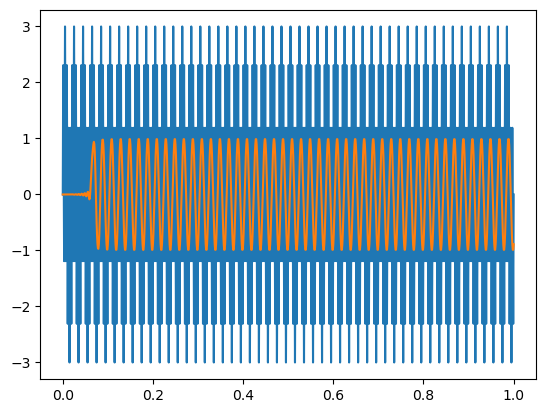

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x17ba86ce0>

In [2]:
using DSP, PyPlot

fs = 1e3
t = 0:1/fs:1
# comment out random noise for testing
x = @. sin(2*pi*50*t) + 2*sin(2*pi*250*t)# + randn() / 10

responsetype = Lowpass(150; fs)
designmethod = FIRWindow(hanning(128; zerophase=false))
#designmethod = FIRWindow(hanning(64; padding=30, zerophase=false))
#designmethod = FIRWindow(rect(128; zerophase=false))
#designmethod = Butterworth(4)
x_low = filt(digitalfilter(responsetype, designmethod), x)

figure()
plot(t, x)
plot(t, x_low)